In [1]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


'''# 字符类型的时间
tss1 = '2010/04/09 04:44:11'
'''

#converters强制每个标签的数值类型
sheet = pd.read_excel('flare_euv.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str,'CLASS':str,'SIGN':int,'CLASS_N':float,'SUB':float,'STARTF':float,'ENDF':float,'CON':float,'T_D':int,'SIGN_2':int,'YEAR':int})
sheet1 = pd.read_excel('flare_x_new.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str})
#print(type(sheet1['PEAKT'][0]))
#print(type(sheet['PEAKT'][0]))
sheet1.head()

i=0
j=0

while(sheet['N'][i]!=0):
    
    #split切片，将原日期末尾000000去掉
    euv_start=sheet['DATE'][i].split(' ')[0]+' '+sheet['START'][i]  #将日期和时间整理拼接成字符串
    euv_peakt=sheet['DATE'][i].split(' ')[0]+' '+sheet['PEAKT'][i]
    euv_endt=sheet['DATE'][i].split(' ')[0]+' '+sheet['ENDT'][i]
    #print(type(sheet1['DATE'][j]))
    #print(j)
    #print(i)
    x_peakt=sheet1['DATE'][j].split(' ')[0]+' '+sheet1['PEAKT'][j]
#print(euv_start)
    timeArray1 = time.strptime(euv_start, "%Y-%m-%d %H:%M:%S")
    timeStamp1 = int(time.mktime(timeArray1))

    timeArray2 = time.strptime(euv_peakt, "%Y-%m-%d %H:%M:%S")
    timeStamp2 = int(time.mktime(timeArray2))

    timeArray3 = time.strptime(euv_endt, "%Y-%m-%d %H:%M:%S")
    timeStamp3 = int(time.mktime(timeArray3))


    timeArray4 = time.strptime(x_peakt, "%d-%m-%Y %H:%M:%S")  #将日期转化为TAI，秒数格式，唯一识别
    timeStamp4 = int(time.mktime(timeArray4))

    if(timeStamp4>timeStamp1) and (timeStamp4<timeStamp3): #比较x的峰值时间是否在ly耀斑的起始和结束时间段内
        #sheet['CLASS'][i]=sheet1['CLASS'][j]
        sheet.loc[i,('CLASS')]=sheet1['CLASS'][j]
        sheet1.loc[j,('SIGN_1')]=1
        t_d=timeStamp2-timeStamp4
        sheet.loc[i,('T_D')]=t_d
        if(t_d>10): #筛选峰值差大的
            sheet.loc[i,('SIGN_2')]=1
        elif(t_d<-10):
            sheet.loc[i,('SIGN_2')]=2
        elif (t_d>=-10) and (t_d<=10): #筛选峰值差小
            sheet.loc[i,('SIGN_2')]=3
            
        i=i+1
        j=j+1
    elif timeStamp4<timeStamp1:
        j=j+1
    else:
        i=i+1


#lya事件列表的标记
k=0
while(sheet['N'][k]!=0):
    if(sheet['CLASS'][k][0]=='M'):
        sheet.loc[k,('SIGN')]=3  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
        
    elif sheet['CLASS'][k][0]=='X':
        sheet.loc[k,('SIGN')]=4  #将M和X级耀斑做标记，后期去掉
        k=k+1
    
    
    elif sheet['CLASS'][k][0]=='0':
        sheet.loc[k,('SIGN')]=0  #将M和X级耀斑做标记，后期去掉
        k=k+1
        
        
    elif sheet['CLASS'][k][0]=='B':#取得耀斑级别对应峰值流量
        num=float(sheet['CLASS'][k][1:]) #截取字符串
        #rate=sheet['SIGNIF(%)'][k]/num#rate率越大，Ly与x差异越大
        num=round(num*(10)**(-7),10)
        sheet.loc[k,('CLASS_N')]=num
        #sheet.loc[k,('RATE')]=rate
        sheet.loc[k,('SIGN')]=1  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet['CLASS'][k][0]=='C':
        num=float(sheet['CLASS'][k][1:])
        num=round(num*(10)**(-6),10) #取得耀斑级别对应峰值流量,round控制小数位数
        sheet.loc[k,('CLASS_N')]=num #将峰值流量值做成科学计数法，放到CLASS_N标签中
        sheet.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        
        k=k+1
    else:
        k=k+1


        
        
#xrs事件列表的标记        
k=0
while(sheet1['N'][k]!=0):
    if(sheet1['CLASS'][k][0]=='B') and (sheet1['SIGN_1'][k]==1):
        sheet1.loc[k,('SIGN')]=1  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet1['CLASS'][k][0]=='C' and sheet1['SIGN_1'][k]==1:#取得耀斑级别对应峰值流量      
        sheet1.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet1['CLASS'][k][0]=='M' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=3  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    elif sheet1['CLASS'][k][0]=='X' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=4  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    else:
        k=k+1       
        
        
        
        
        
        
        
        
        
l=0        
while(sheet['N'][l]!=0):
    sheet.loc[l,('DATE')]=sheet['DATE'][l].split(' ')[0]  
    sheet.loc[l,('YEAR')]=int(sheet['DATE'][l][0:4])#将列表中的年份提取出来存储
    l=l+1
    #print(l)

m=0
while(sheet['N'][m]!=0):
    #print(m)
    groud=max(sheet['STARTF'][m],sheet['ENDF'][m])#选取开始或结束中
    #print(type(groud))
    con=sheet['PEAKF'][m]/groud #相对背景的比值
    sub=sheet['PEAKF'][m]-groud #减掉背景后
    sub=round(sub*(10)**(-3),10)
    con=round(con,6)
    sheet.loc[m,('SUB')]=sub
    sheet.loc[m,('CON')]=con
    m=m+1
    
q=0
while(sheet['N'][q]!=0):
    if(sheet['CLASS'][q][0]=='B'):
        rate=sheet['SUB'][q]/sheet['CLASS_N'][q]
        #sheet.loc[q,('RATE')]=rate  #将M和X级耀斑做标记，后期去掉
        q=q+1
        #print(k)
    else:
        q=q+1

#sheet.head(50)


sheet_new_M=sheet
sheet_new_M=sheet_new_M[sheet_new_M['SIGN'] == 3]
sheet_new_X=sheet
sheet_new_X=sheet_new_X[sheet_new_X['SIGN'] == 4]


sheet1_new_M=sheet1
sheet1_new_M=sheet1_new_M[sheet1_new_M['SIGN'] == 3]
sheet1_new_X=sheet1
sheet1_new_X=sheet1_new_X[sheet1_new_X['SIGN'] == 4]

print(len(sheet_new_X))
sheet1_new_X.head(50)

32


,N,DATE,START,PEAKT,ENDT,CLASS,SS,SIGN,SIGN_1
1092,1093,15-02-2011,01:44:00,01:56:00,02:06:00,X2.2,11158,4,1
2109,2110,9-08-2011,07:48:00,08:05:00,08:08:00,X6.9,N17W69 11263,4,1
2263,2264,6-09-2011,22:12:00,22:20:00,22:24:00,X2.1,N14W18 11283,4,1
2268,2269,7-09-2011,22:32:00,22:38:00,22:44:00,X1.8,N14W28 11283,4,1
2366,2367,22-09-2011,10:29:00,11:01:00,11:44:00,X1.4,11302,4,1
2385,2386,24-09-2011,09:21:00,09:40:00,09:48:00,X1.9,N12E60 11302,4,1
2629,2630,3-11-2011,20:16:00,20:27:00,20:32:00,X1.9,N22E63 11339,4,1
3265,3266,7-03-2012,00:02:00,00:24:00,00:40:00,X5.4,11429,4,1
3266,3267,7-03-2012,01:05:00,01:14:00,01:23:00,X1.3,N22E12 11430,4,1
4086,4087,6-07-2012,23:01:00,23:08:00,23:14:00,X1.1,11515,4,1


In [2]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


time_start = time.time()


#前面筛选索引乱了，需要重置索引
sheet_xrs_time = sheet1_new_X.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_X.reset_index(drop=True)
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
lya_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_start=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_start.append(int(sheet_lya_time['START'][i][0:2])*3600+int(sheet_lya_time['START'][i][3:5])*60+int(sheet_lya_time['START'][i][6:8]))
    list_time_end.append(int(sheet_lya_time['ENDT'][i][0:2])*3600+int(sheet_lya_time['ENDT'][i][3:5])*60+int(sheet_lya_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有
        if(abs(list_time_start[n]-sheet3_lya_time.loc[m,n])<10) and (if_flag == False): #取一个阈值
            
            print('起始点:',sheet3_lya_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            lya_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
             
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('结束点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        lya_num_list_end.append(m-1)
        print('非结束位置：',m-1)
        

        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20110215
起始点: 6324.136000037193
起始点位置已存入列表： 579
结束点: 9971.570000052452
结束位置已存入列表： 913
20110809
起始点: 28737.174000024796
起始点位置已存入列表： 2631
结束点: 30690.93400001526
结束位置已存入列表： 2810
20110906
起始点: 79909.71000003815
起始点位置已存入列表： 7004
结束点: 80782.14700007439
结束位置已存入列表： 7084
20110907
起始点: 81054.52399992943
起始点位置已存入列表： 7089
结束点: 83151.65400004387
结束位置已存入列表： 7281
20110922
起始点: 38731.169999957085
起始点位置已存入列表： 3087
结束点: 39789.96700000763
结束位置已存入列表： 3184
20110924
起始点: 34241.96300005913
起始点位置已存入列表： 2674
结束点: 35421.59000003338
结束位置已存入列表： 2782
20111103
起始点: 72842.26999998093
起始点位置已存入列表： 6612
结束点: 74077.20000004768
结束位置已存入列表： 6725
20120307
起始点: 753.6569999456406
起始点位置已存入列表： 69
结束点: 3330.0169999599457
结束位置已存入列表： 305
20120307
起始点: 3801.053999900818
起始点位置已存入列表： 348
结束点: 6750.146999955177
结束位置已存入列表： 617
20120706
起始点: 82922.81999993324
起始点位置已存入列表： 7561
结束点: 84813.12000000477
结束位置已存入列表： 7734
20120712
起始点: 59549.1930000782
起始点位置已存入列表： 5446
结束点: 61363.6970000267
结束位置已存入列表： 5612
20121023
起始点: 11556.789999961853
起始点位置

In [3]:
import time

time_start = time.time()




sheet3_lya_time_new_2=sheet3_lya_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_lya_value_new_2=sheet3_lya_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_lya_energy_1=[]
for n in range(sheet3_lya_time_new_2.shape[1]):
    a=0
    for m in range(lya_num_list_start[n],lya_num_list_end[n],1):
        if(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])*(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_lya_energy_1.append(a)
print('lya能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

lya能量积分计算完毕
Time cost = 3.783113s


In [4]:
#xrs时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy



time_start = time.time()


sheet_xrs_time = sheet1_new_X.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_X.reset_index(drop=True) #重置索引sheet_xrs_time
l_index=range(100)
sheet3_xrs_time = pd.DataFrame()
sheet3_xrs_value = pd.DataFrame()

xrs_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_list_year=[]
xrs_list_time_start=[]
xrs_list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    
    xrs_list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    xrs_list_time_start.append(int(sheet_xrs_time['START'][i][0:2])*3600+int(sheet_xrs_time['START'][i][3:5])*60+int(sheet_xrs_time['START'][i][6:8]))
    xrs_list_time_end.append(int(sheet_xrs_time['ENDT'][i][0:2])*3600+int(sheet_xrs_time['ENDT'][i][3:5])*60+int(sheet_xrs_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in xrs_list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_xrs['tsecs'])):
        sheet3_xrs_time.loc[m,n]=sheet_xrs['tsecs'][j]-sheet_xrs['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_xrs_value.loc[m,n]=sheet_xrs['yclean'][0][j]#yclean的数据有两列，选第一列
        if(abs(xrs_list_time_start[n]-sheet3_xrs_time.loc[m,n])<4) and (if_flag == False): #取一个阈值
               #他们之差大致是时间分辨率，xrs是2s，ly是10s，这样便于确定数据的起始和结束的边界
            print('起始点:',sheet3_xrs_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            xrs_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
        
        if((xrs_list_time_end[n]-sheet3_xrs_time.loc[m,n])<4): #取一个阈值
            
            print('结束点:',sheet3_xrs_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        xrs_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        xrs_num_list_end.append(m-1)
        print('非结束位置：',m-1)

        
        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20110215
起始点: 6236.072999954224
起始点位置已存入列表： 3045
结束点: 7557.013000011444
结束位置已存入列表： 3690
20110809
起始点: 28077.730000019073
起始点位置已存入列表： 13710
结束点: 29277.84000003338
结束位置已存入列表： 14296
20110906
起始点: 79917.89800000191
起始点位置已存入列表： 39023
结束点: 80636.74199998379
结束位置已存入列表： 39374
20110907
起始点: 81118.00800001621
起始点位置已存入列表： 39609
结束点: 81836.85199999809
结束位置已存入列表： 39960
20110922
起始点: 37737.90999996662
起始点位置已存入列表： 18414
结束点: 42237.28100001812
结束位置已存入列表： 20611
20110924
起始点: 33656.25
起始点位置已存入列表： 16434
结束点: 35276.18799996376
结束位置已存入列表： 17225
20111103
起始点: 72956.95299994946
起始点位置已存入列表： 35624
结束点: 73917.46099996567
结束位置已存入列表： 36093
20120307
起始点: 116.73699998855591
起始点位置已存入列表： 57
结束点: 2396.139999985695
结束位置已存入列表： 1170
20120307
起始点: 3897.3099999427795
起始点位置已存入列表： 1903
结束点: 4976.597000002861
结束位置已存入列表： 2426
20120706
起始点: 82857.28600001335
起始点位置已存入列表： 40302
结束点: 83637.56999993324
结束位置已存入列表： 40683
20120712
起始点: 56217.143000006676
起始点位置已存入列表： 27423
结束点: 62997.97600007057
结束位置已存入列表： 30734
20121023
起始点: 11577.217

In [5]:
import time

time_start = time.time()




sheet3_xrs_time_new_2=sheet3_xrs_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_xrs_value_new_2=sheet3_xrs_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_xrs_energy_1=[]
for n in range(sheet3_xrs_time_new_2.shape[1]):
    a=0
    for m in range(xrs_num_list_start[n],xrs_num_list_end[n],1):
        if(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])*(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_xrs_energy_1.append(a)
print('xrs能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

xrs能量积分计算完毕
Time cost = 26.365810s


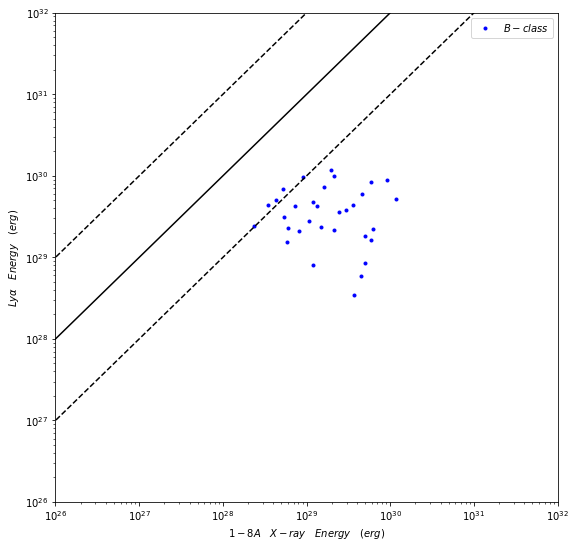

In [6]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x=sheet4_xrs_energy_1
y=sheet4_lya_energy_1


#x2=[10**(0),10**(7)]
#y2=[10**(0),10**(7)]

x3=[10**(0),10**(6)]
y3=[10**(1),10**(7)]

x4=[10**(0),10**(5)]
y4=[10**(2),10**(7)]

x5=[10**(0),10**(4)]
y5=[10**(3),10**(7)]

#x6=[10**(0),10**(3)]
#y6=[10**(4),10**(7)]


plt.figure(figsize=(9, 9))
#plt.scatter(x, y)

x_new = np.divide(x, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴
y_new = np.divide(y, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴


plt.loglog(x_new, y_new,'b.',label=r'$B-class$')
#plt.loglog(x1,y1,'r.',label=r'$C-class$')

#plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'--',color='black')
plt.plot(x4,y4,'-',color='black')
plt.plot(x5,y5,'--',color='black')
#plt.plot(x6,y6,'--',color='black')

plt.ylim(10**(1),10**(7))
plt.xlim(10**(1),10**(7))
#Plot.xlim(10**(5), 10**(6));Plot.ylim(10**(5), 10**(6))

x_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
x_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.xticks(x_ticks,x_name)  #设置坐标刻度

y_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
y_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.yticks(y_ticks,y_name)  #设置坐标刻度


plt.xlabel(r'$1-8{A} \quad X-ray \quad Energy \quad (erg)$')
plt.ylabel(r'$Lyα \quad Energy \quad (erg)$')
plt.legend() #图例
plt.show()

In [7]:
np.savetxt('xrs_X.csv',sheet4_xrs_energy_1, delimiter = ',')
np.savetxt('lya_X.csv',sheet4_lya_energy_1, delimiter = ',')